# Lab 1
# Introduction to basic concepts
# ---------------------------------------------------

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li> Import Data </li>
    <li> Data set description </li>
    <li> Descriptive Statistical Analysis </li>
    <li> Analyzing Feature Patterns using Visualization </li>
    <li> Basics of Grouping </li>
    <li> Dealing with missing values </li>
    <li> Dealing with outliers </li>
    <li> Dealing with imbalaced classes </li>
    <li> Feature transformation. One hot encoding  </li>
    <li> Normalization  </li>
    <li> Correlation  </li>
    <li> Training, validation and test sets </li>
   
</ol>

</div>

<hr>


This lab is focused on familiarizing the student with basic concepts of machine learning (data science): introduction, data visualization, pre-processing, data cleaning and generation of training and test subsets.

## 1.- Import data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [4]:
#Load data from csv and store it in a dataframe
data = pd.read_csv("pima_indian_diabetes.csv") #We can change this database
n = 10
data.head(n)# Show the first individuals
# Return the first n rows

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

## 2.- Data set description - "Pima Indian Diabetes"

 In this data set the goal is to predict, based on diagnostic measurements, whether a patient has diabetes. All patients here are females at least 21 years old of Pima Indian heritage.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

In [5]:
print(data.shape) # Number of entries in the dataset:

(768, 9)


#### a) Indicate for each variable what type it is (numerical, categorical, etc.).

In [6]:
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


#### b) Columns name

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### c) Add a categorical variable

In [8]:
category=pd.cut(data.Age,bins=[0,2,17,40,65,99],labels=['Baby','Child','Adult1', 'Adult2','Elderly'])
data.insert(8,'AgeCategory', category)
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'AgeCategory', 'Outcome'],
      dtype='object')

In [9]:
data.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
AgeCategory                 category
Outcome                        int64
dtype: object

In [10]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age AgeCategory  Outcome  
0                     0.627   50      Adult2        1  
1                     0.351   31      Adult1        0  
2                     0.672   32      Adult1        1  
3                     0.167   21      Adult1        0  
4                     2.288   33      Adult1        1

## 3.- Descriptive Statistical Analysis

In [11]:
data.describe() # Describe data using just one line of code

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [12]:
data.describe(include='all') # Are the categorical features included? explore how you can include them.

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count    768.000000  768.000000     768.000000     768.000000  768.000000   
unique          NaN         NaN            NaN            NaN         NaN   
top             NaN         NaN            NaN            NaN         NaN   
freq            NaN         NaN            NaN            NaN         NaN   
mean       3.845052  120.894531      69.105469      20.536458   79.799479   
std        3.369578   31.972618      19.355807      15.952218  115.244002   
min        0.000000    0.000000       0.000000       0.000000    0.000000   
25%        1.000000   99.000000      62.000000       0.000000    0.000000   
50%        3.000000  117.000000      72.000000      23.000000   30.500000   
75%        6.000000  140.250000      80.000000      32.000000  127.250000   
max       17.000000  199.000000     122.000000      99.000000  846.000000   

               BMI  DiabetesPedigreeFunction         Age AgeCategory  \
count   768.000000                768.000000  768.000000         768   
unique         NaN                       NaN         NaN           3   
top            NaN                       NaN         NaN      Adult1   
freq           NaN                       NaN         NaN         574   
mean     31.992578                  0.471876   33.240885         NaN   
std       7.884160                  0.331329   11.760232         NaN   
min       0.000000                  0.078000   21.000000         NaN   
25%      27.300000                  0.243750   24.000000         NaN   
50%      32.000000                  0.372500   29.000000         NaN   
75%      36.600000                  0.626250   41.000000         NaN   
max      67.100000                  2.420000   81.000000         NaN   

           Outcome  
count   768.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean      0.348958  
std       0.476951  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [13]:
print(data.shape) # We have now 10 features as we add the agecategory


(768, 10)


In [14]:
data['Pregnancies'].unique().size # Total number of unique values per variable

17

In [15]:
# Check and describe the results when you run: for each value is printed the number appearances in the variable Pregnancies
# For example, 135 womens have 1 children and 111 have 0
data["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [16]:
# Describe the following line of code: 500 patients have not diabete and 268 have
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
# Are the classes balanced? Justify your answer
# No, there are much more adults than children and elders

In [18]:
data["AgeCategory"].value_counts()

Adult1     574
Adult2     181
Elderly     13
Baby         0
Child        0
Name: AgeCategory, dtype: int64

## 4.- Analyzing Feature Patterns using Visualization

#### a) Visualize the histograms of the variables in the database, choosing a number of intervals (bins) suitable for each variable. Justify this choice.

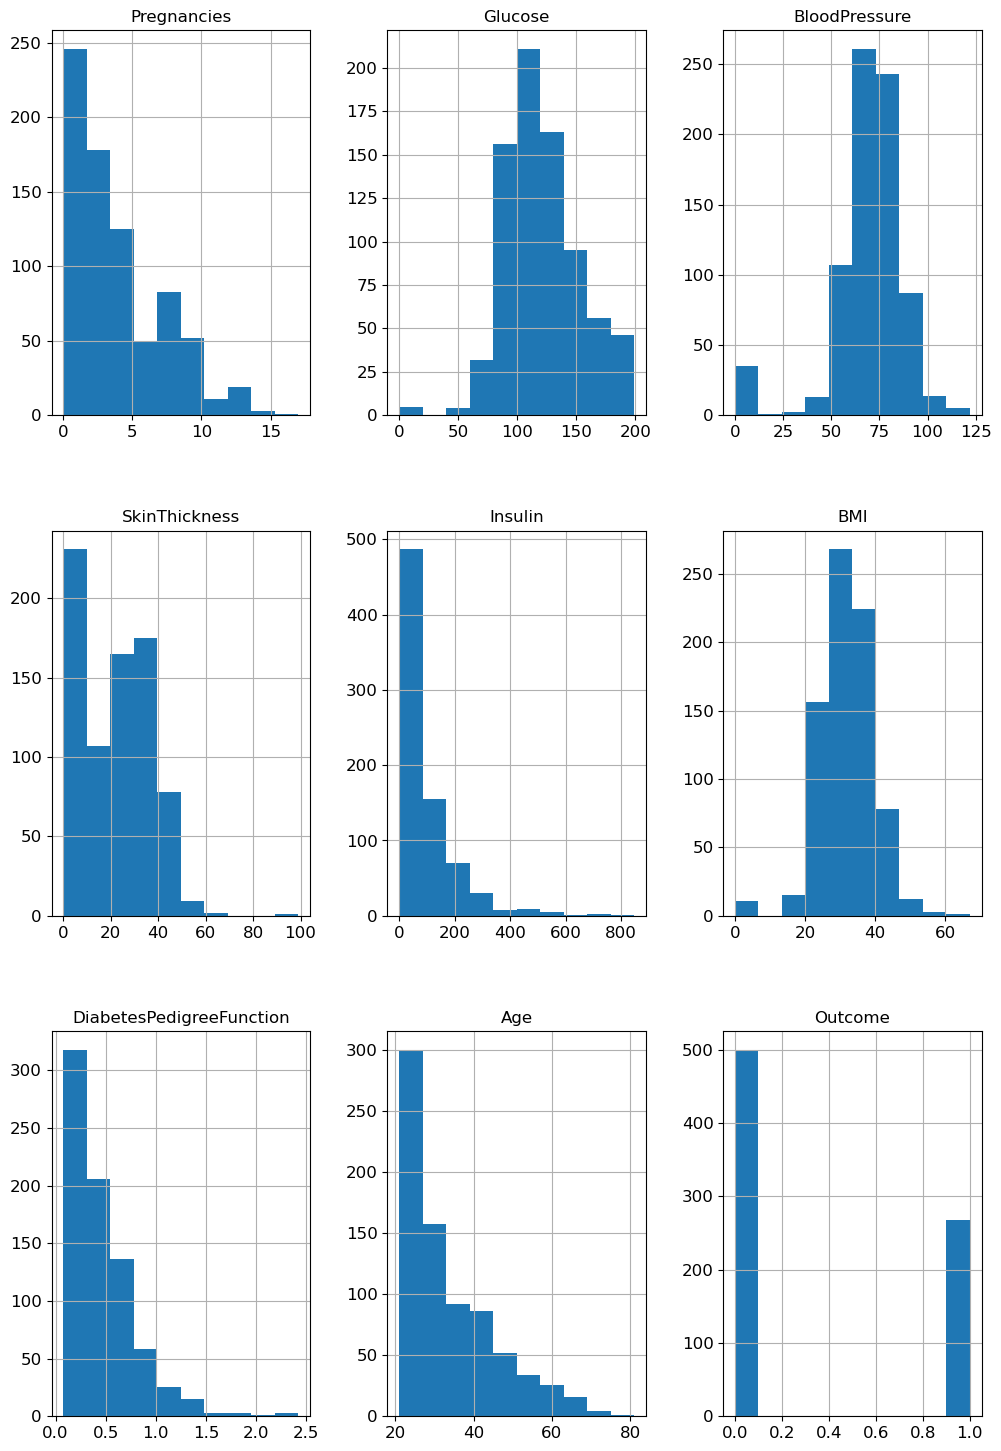

In [19]:
ax = data.hist(bins=10, figsize=(12, 18), xlabelsize=12, ylabelsize=12) # Plot a histogram for each feature. Define the size of the figure (12,18); change the number of bins as well and the xlabel and ylabel sizes

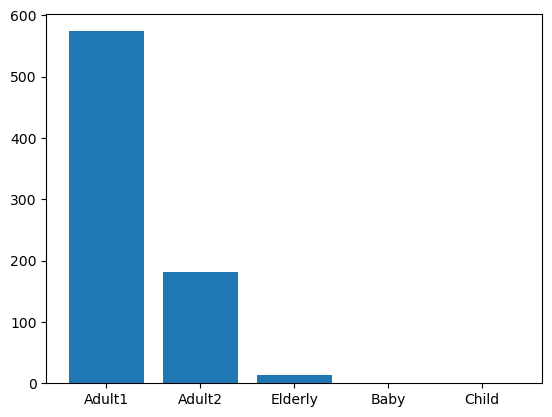

In [20]:
# Plot the categories of the "age category" feautre using bars
counts = data['AgeCategory'].value_counts()

# create a bar plot
plt.bar(counts.index, counts.values)
plt.show()

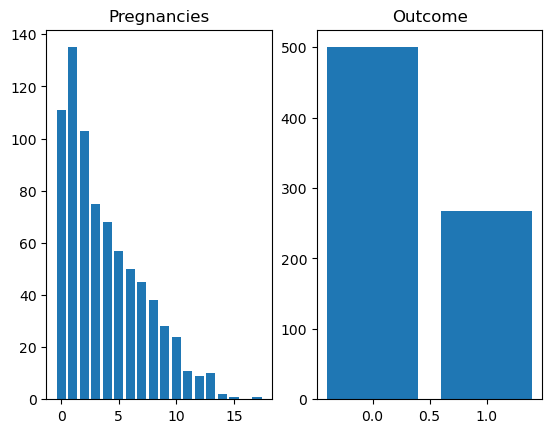

In [21]:
# Do the same for the features "Pregnancies" and "Outcome". Which is the most frequent value for the feature "Pregnacies"?

counts_preg = data['Pregnancies'].value_counts()
plt.subplot(1, 2, 1), plt.bar(counts_preg.index, counts_preg.values), plt.title('Pregnancies')

counts_out = data['Outcome'].value_counts()
plt.subplot(1, 2, 2), plt.bar(counts_out.index, counts_out.values), plt.title('Outcome')
plt.show()

# We find again that the more pregnancies are 1 and outcome 0

In [22]:
# Plot the number of cases and control. Can you see visually is the classes are balanced?

With the last plot, we can see that the outcome classes are not really balanced. There are more non diabetics than diabetics.

#### b) Plot boxplots

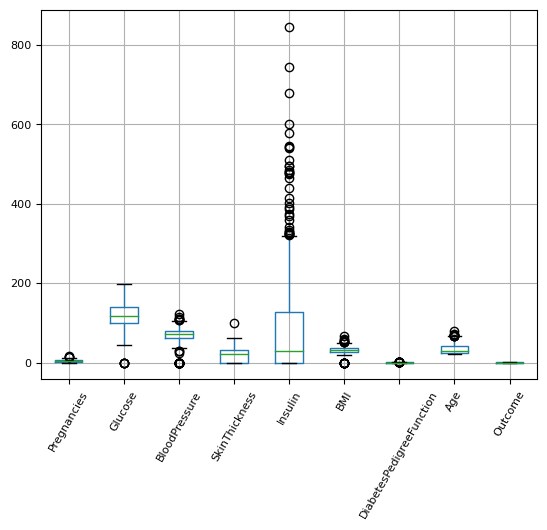

In [23]:
# Check the following plot, do you think this is a good one? How you can improve this figure?
# The data has to be normalized if we want all the features displayed in one graph
boxplot = data.boxplot(grid=True, rot=60, fontsize=8)

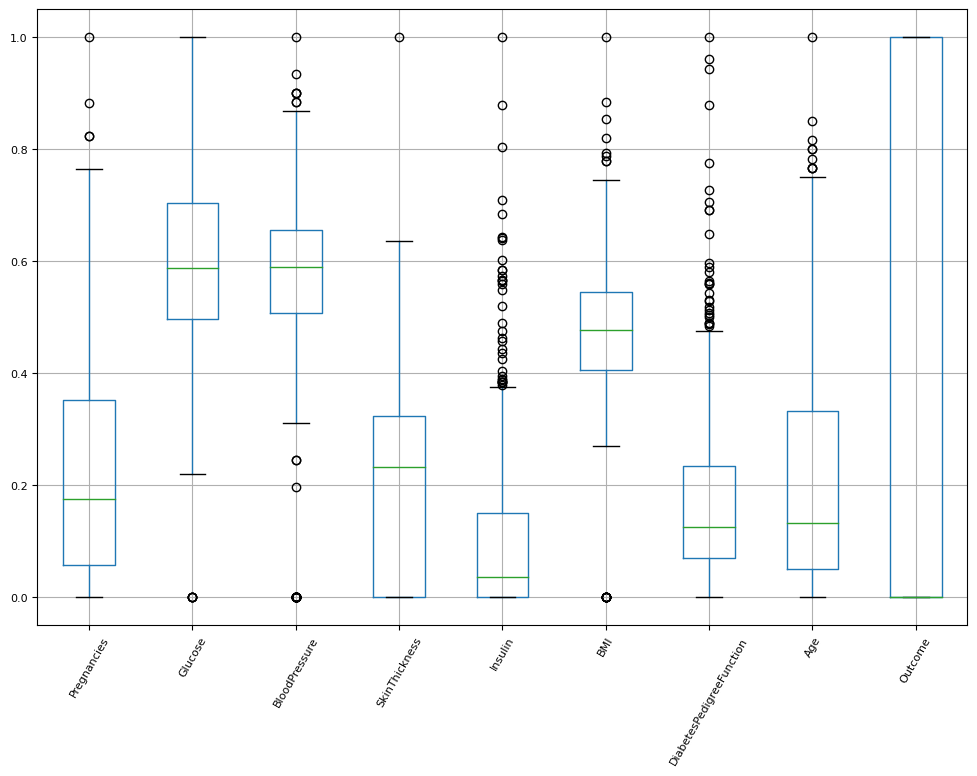

In [24]:
def min_max_scaling(column):
    '''Normalize each column of a table between 0 and 1. '''
    return (column - column.min()) / (column.max() - column.min())

numerical_columns = data.select_dtypes(include=['number']).columns

# Apply min_max_scaling to all numerical columns
data_norm = data[numerical_columns].apply(min_max_scaling)
data_norm['AgeCategory'] = data['AgeCategory']
boxplot = data_norm.boxplot(grid=True, rot=60, fontsize=8, figsize=(12, 8))

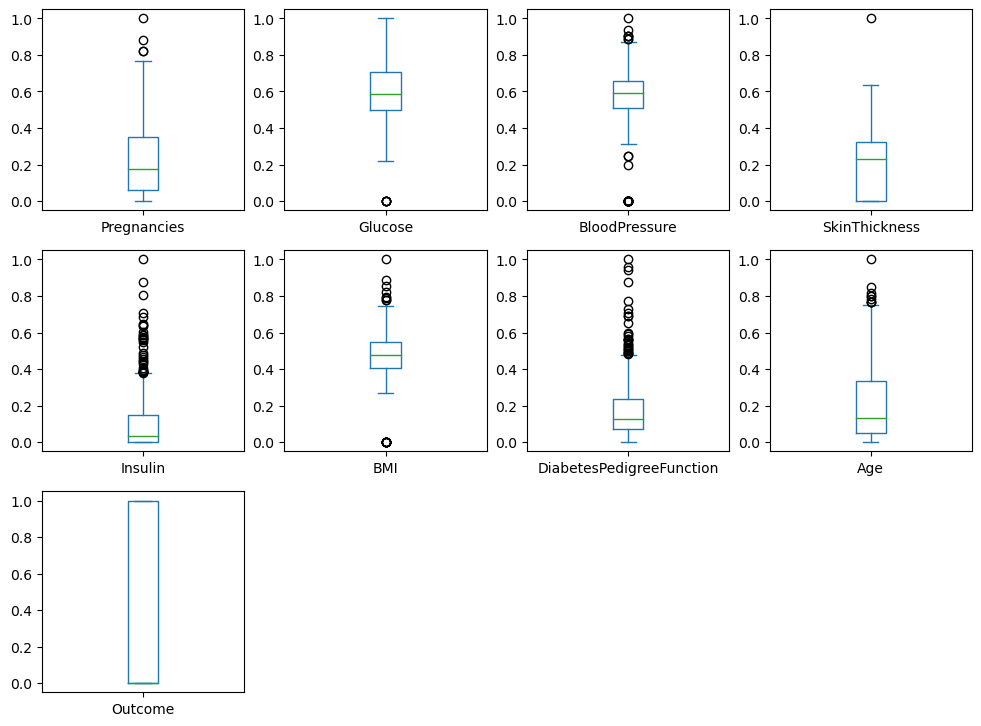

In [25]:
data_norm.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(12, 12))
plt.show()

#### c) Plot scatter plots

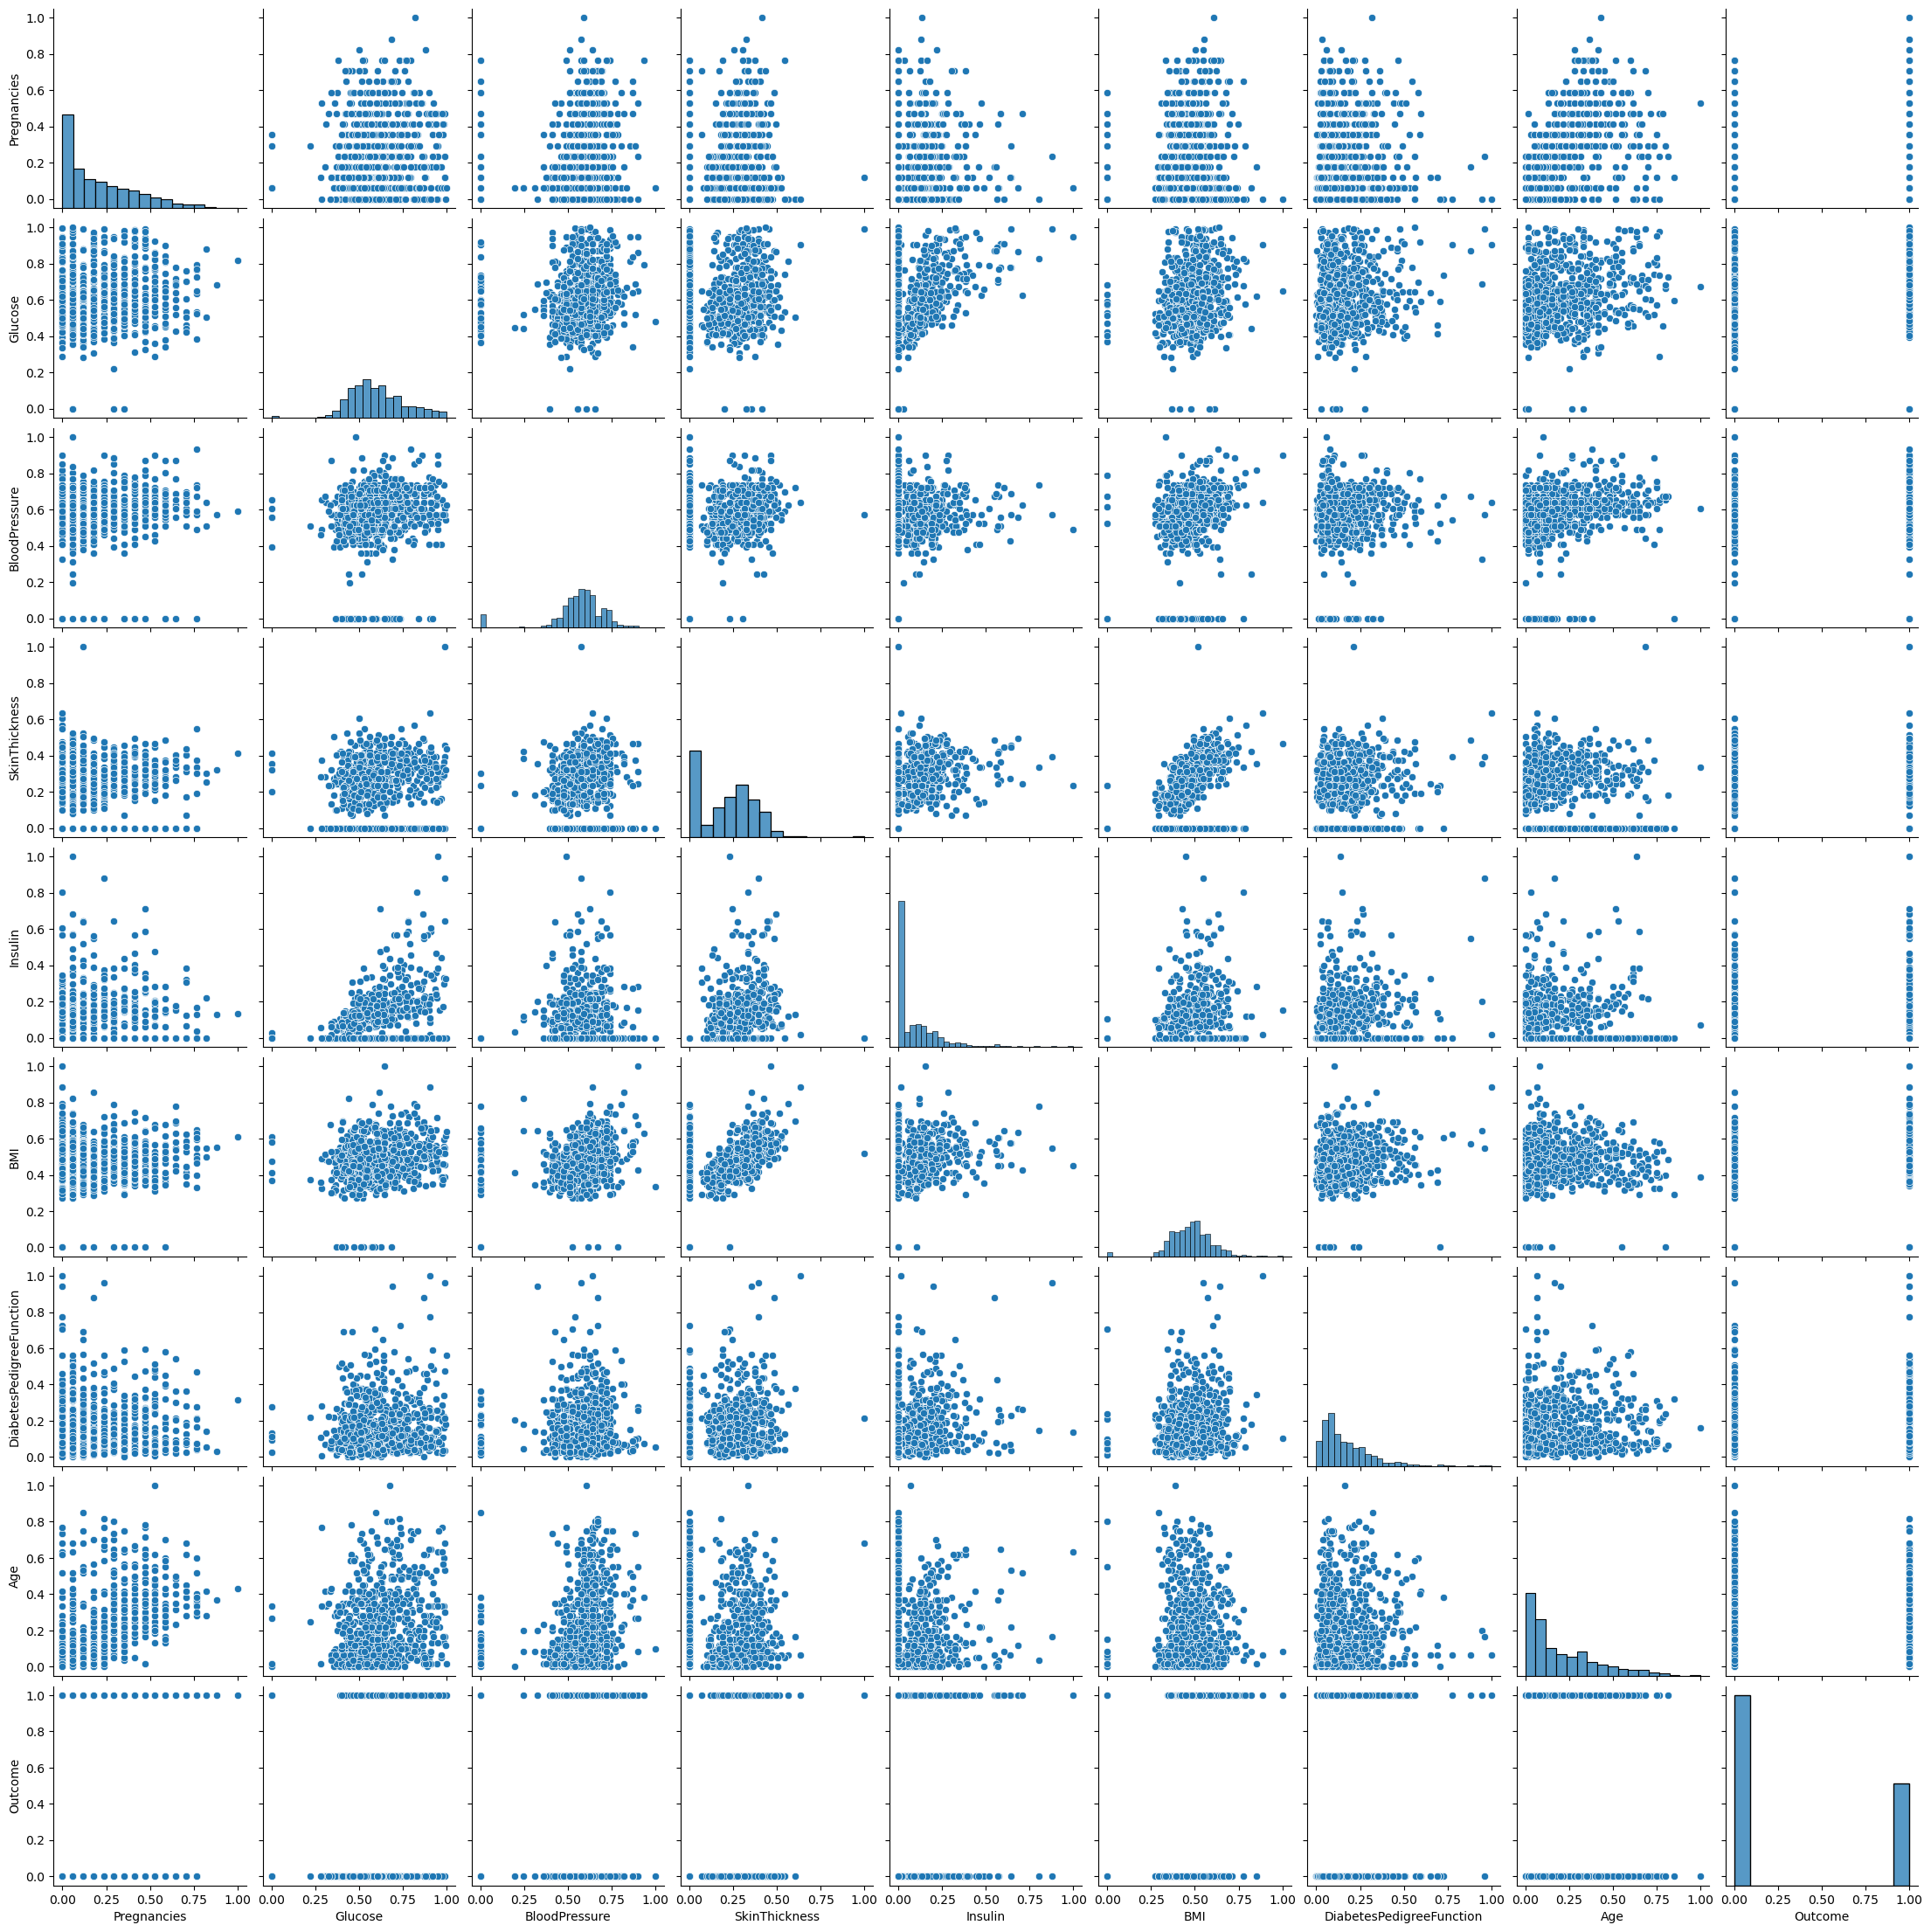

In [26]:
# Scatter plots. What are we showing in the follwing plot?
# We represent one variable according to another variable
sns.pairplot(data_norm)

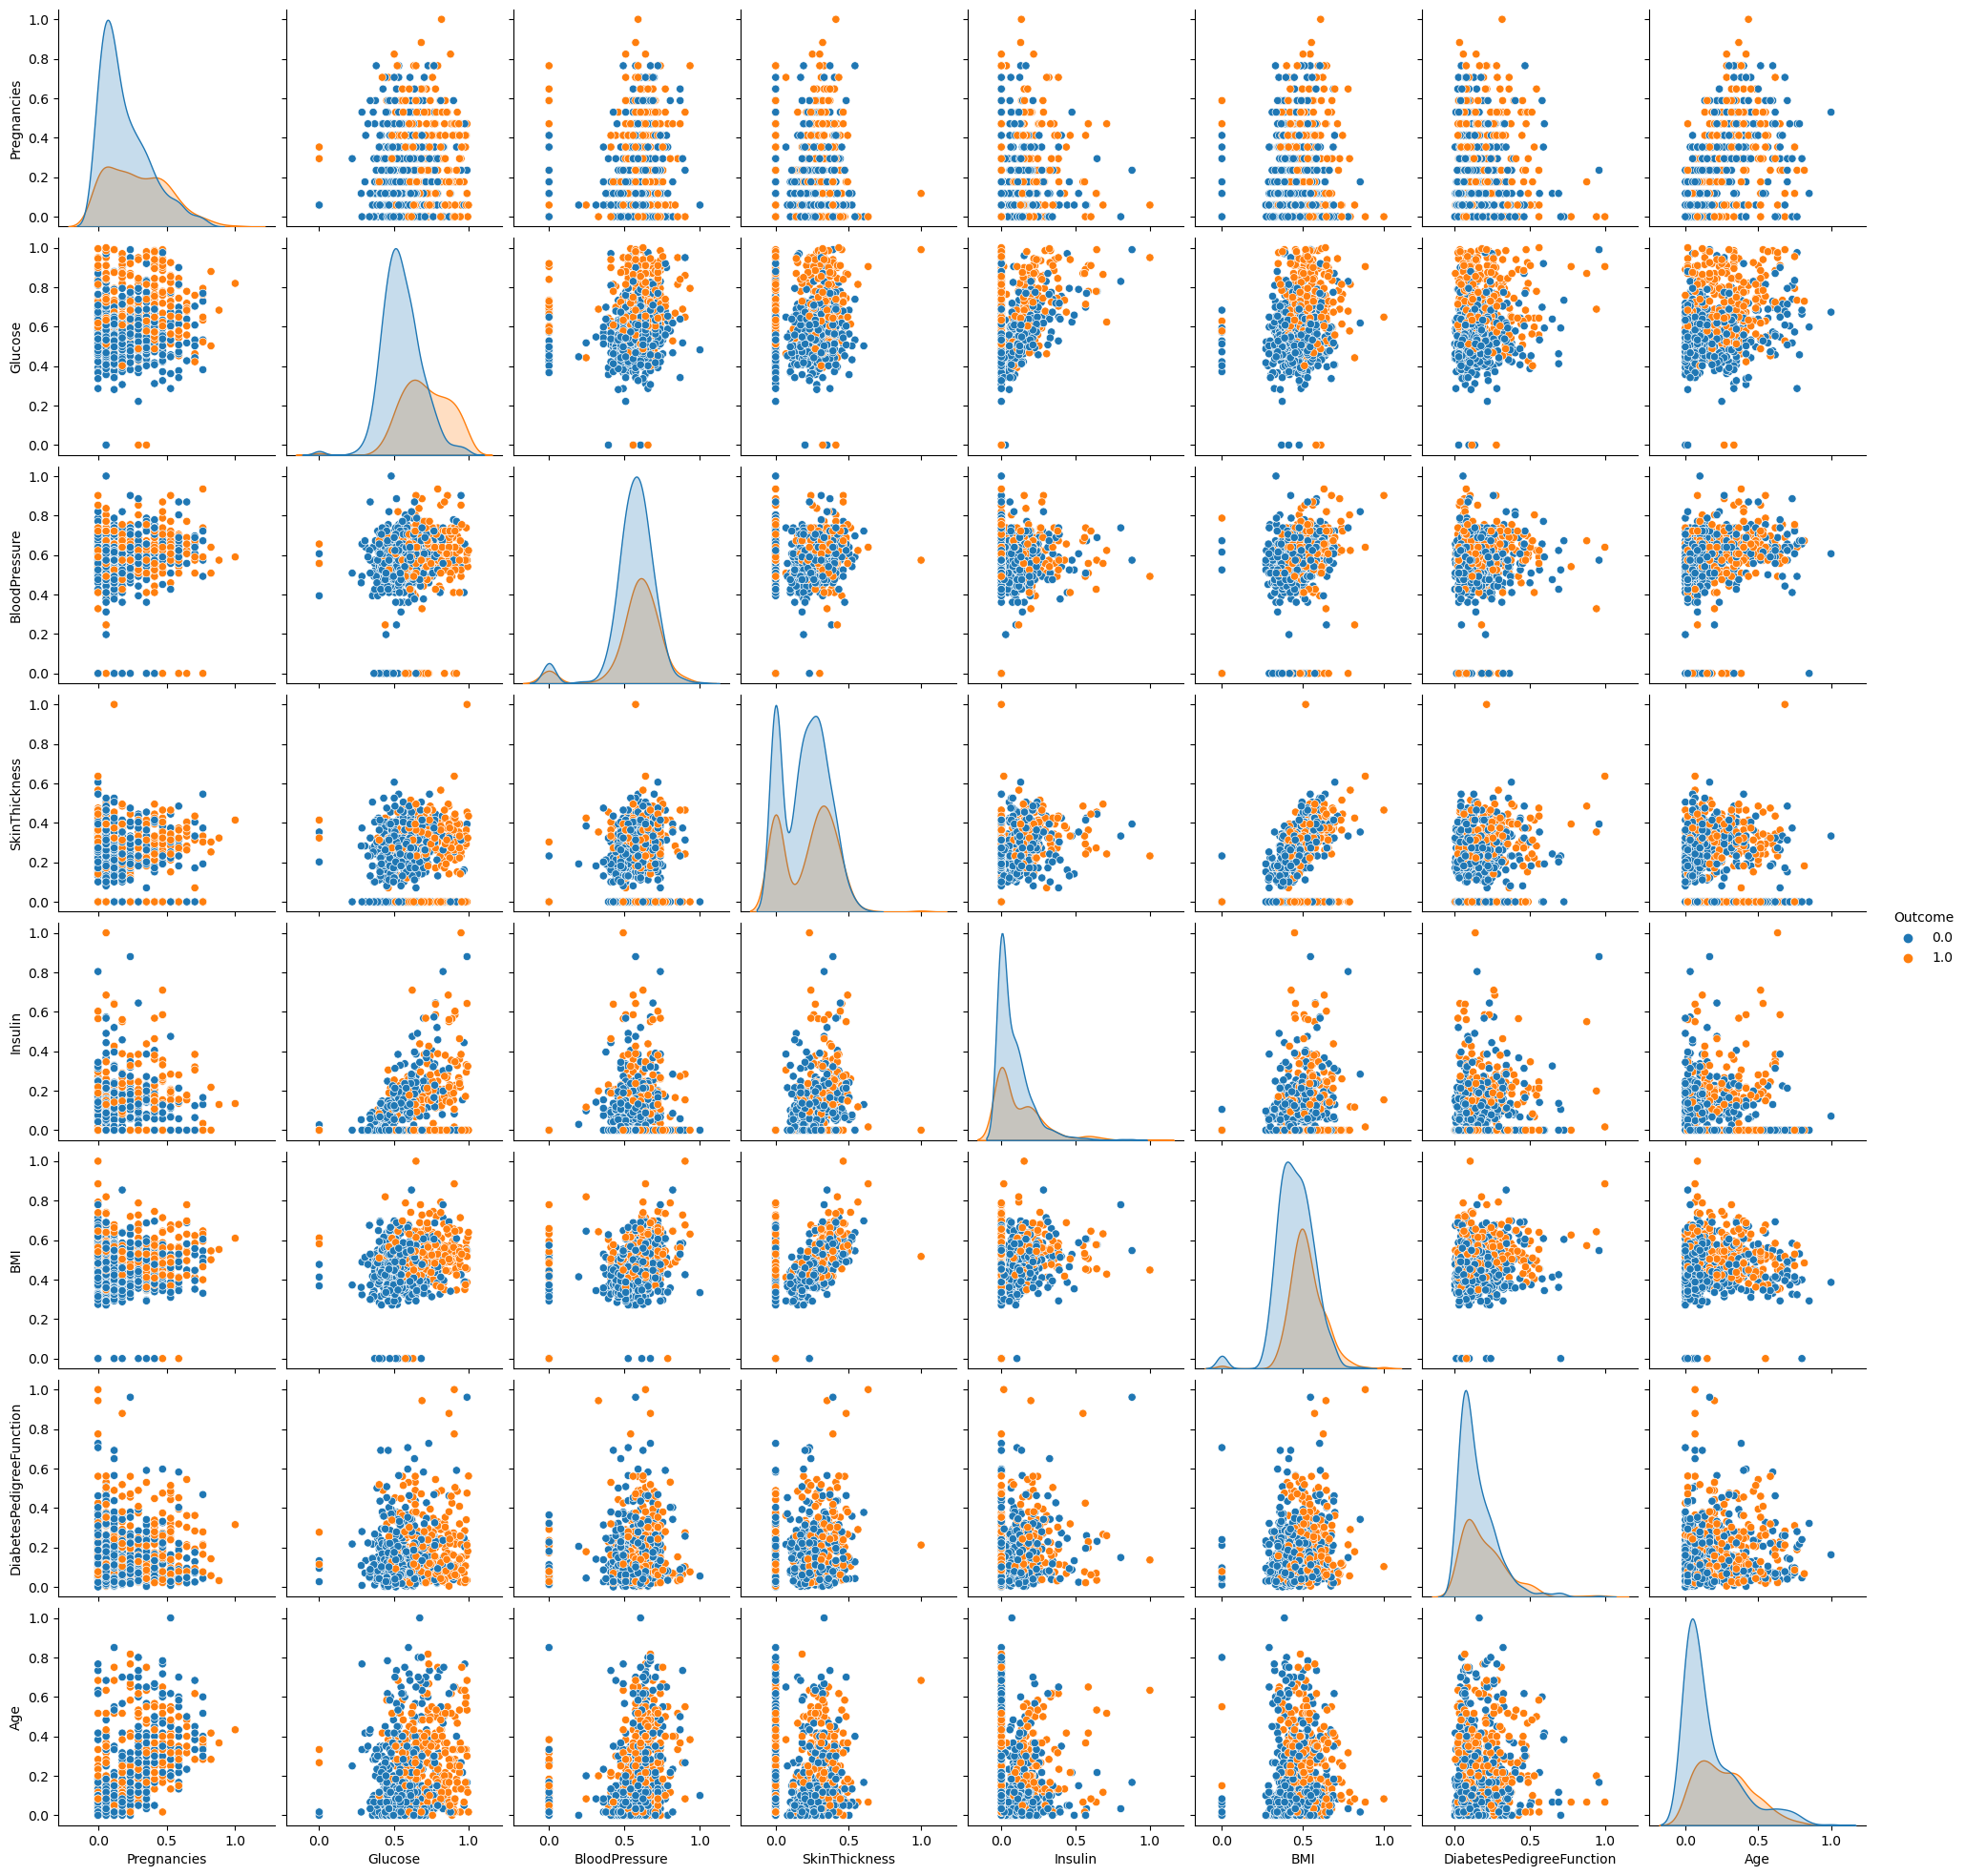

In [27]:
sns.pairplot(data_norm, hue='Outcome') # Include the information of the outcome as the hue

Useful link: https://seaborn.pydata.org/tutorial/categorical.html

## 5.- Basics of Grouping

In [28]:
# Can you extract some insigths from the following results?
data.groupby(['Outcome', 'AgeCategory']).mean()
# Many features are variating according to the outcome and the age category
# For example, people with 0 outcome have lower glucose levels than those with 1 outcome
# Another example, blood pressure is the same for all age categories in 0 and 1 outcome aside from the elderly age category
# Here, we shouldn't use the normalized data. For example, age would be wrong

Pregnancies     Glucose  BloodPressure  SkinThickness  \
Outcome AgeCategory                                                          
0       Baby                 NaN         NaN            NaN            NaN   
        Child                NaN         NaN            NaN            NaN   
        Adult1          2.607843  108.401961      66.745098      20.703431   
        Adult2          6.457831  115.891566      75.180723      16.289157   
        Elderly         5.444444  127.000000      68.888889       3.666667   
1       Baby                 NaN         NaN            NaN            NaN   
        Child                NaN         NaN            NaN            NaN   
        Adult1          3.620482  139.716867      66.512048      23.295181   
        Adult2          7.010204  143.112245      77.530612      20.969388   
        Elderly         4.000000  159.750000      85.500000       4.500000   

                        Insulin        BMI  DiabetesPedigreeFunction  \
Outcome AgeCategory                                                    
0       Baby                NaN        NaN                       NaN   
        Child               NaN        NaN                       NaN   
        Adult1        75.428922  30.093627                  0.426645   
        Adult2        42.903614  32.093976                  0.436795   
        Elderly        6.666667  23.344444                  0.504667   
1       Baby                NaN        NaN                       NaN   
        Child               NaN        NaN                       NaN   
        Adult1        98.939759  35.821084                  0.581711   
        Adult2       106.795918  34.018367                  0.501347   
        Elderly        0.000000  34.525000                  0.459500   

                           Age  
Outcome AgeCategory             
0       Baby               NaN  
        Child              NaN  
        Adult1       26.504902  
        Adult2       50.072289  
        Elderly      69.444444  
1       Baby               NaN  
        Child              NaN  
        Adult1       29.891566  
        Adult2       47.989796  
        Elderly      67.250000

<Axes: xlabel='AgeCategory', ylabel='Insulin'>

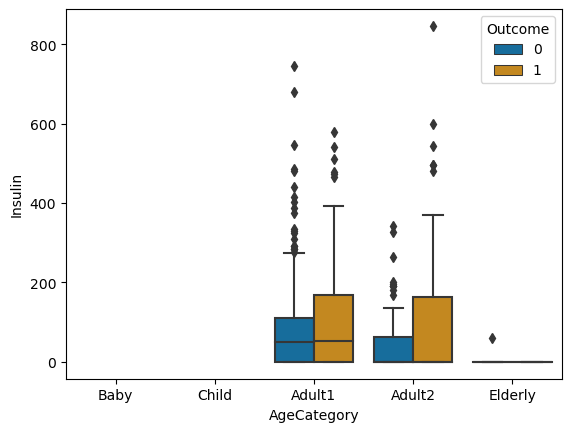

In [29]:
# The following code plots insulin levels according to the age category with one color for each outcome value
# It allows to see that people with diabete (outcome 1) have higher insulin levels than control groups for Adult1 and 2 categories
# Elderly people have really low insulin levels, which is weard
sns.boxplot(y='Insulin', x='AgeCategory',
                 data=data,
                 palette="colorblind",
                 hue='Outcome')


## 6.- Dealing with Missing Values

#### a) Indicate which variables present null values and justify how you have identified them.


In [30]:
# Missing values
data.isnull().values.any()

False

In [31]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
AgeCategory                 0
Outcome                     0
dtype: int64

There are no missing values

### b) Zero values

In [32]:
# Identify the number of '0' values per feature
(data == 0).sum(axis=0)
# Features with problem: Glucose, blood pressure, skin thickness, BMI. It is normal to have 0 pregnancies.

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
AgeCategory                   0
Outcome                     500
dtype: int64

In [33]:
# Identify the number of '0' values per observation
(data == 0).sum(axis=1)

0      1
1      2
2      2
3      1
4      1
      ..
763    1
764    2
765    1
766    2
767    2
Length: 768, dtype: int64

Are all of them missing values? we need clinical/expert knowlegde, for example, BMI cannot be 0; Glucose cannot be zero

##### What can we do?

We can eliminate these observations or we can replace them with a constant or with a statistic

#### c) Replace zeros with mean value
It is not possible to have a 0 blood pressure or glucose level so we replace it with the mean value.

In [34]:
# drop outcome and pregnancies column because we want to keep the zeros of those column
no_bool_data = data.drop(columns=['Outcome']).drop(columns=['Pregnancies'])
no_bool_data

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age AgeCategory  
0                       0.627   50      Adult2  
1                       0.351   31      Adult1  
2                       0.672   32      Adult1  
3                       0.167   21      Adult1  
4                       2.288   33      Adult1  
..                        ...  ...         ...  
763                     0.171   63      Adult2  
764                     0.340   27      Adult1  
765                     0.245   30      Adult1  
766                     0.349   47      Adult2  
767                     0.315   23      Adult1  

[768 rows x 8 columns]

In [35]:
no_bool_data = no_bool_data.replace(0, no_bool_data.mean(axis=0))

C:\Users\flore\AppData\Local\Temp\ipykernel_5028\725790215.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  no_bool_data = no_bool_data.replace(0, no_bool_data.mean(axis=0))


In [36]:
no_bool_data

Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0      148.0           72.0      35.000000   79.799479  33.6   
1       85.0           66.0      29.000000   79.799479  26.6   
2      183.0           64.0      20.536458   79.799479  23.3   
3       89.0           66.0      23.000000   94.000000  28.1   
4      137.0           40.0      35.000000  168.000000  43.1   
..       ...            ...            ...         ...   ...   
763    101.0           76.0      48.000000  180.000000  32.9   
764    122.0           70.0      27.000000   79.799479  36.8   
765    121.0           72.0      23.000000  112.000000  26.2   
766    126.0           60.0      20.536458   79.799479  30.1   
767     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age AgeCategory  
0                       0.627   50      Adult2  
1                       0.351   31      Adult1  
2                       0.672   32      Adult1  
3                       0.167   21      Adult1  
4                       2.288   33      Adult1  
..                        ...  ...         ...  
763                     0.171   63      Adult2  
764                     0.340   27      Adult1  
765                     0.245   30      Adult1  
766                     0.349   47      Adult2  
767                     0.315   23      Adult1  

[768 rows x 8 columns]

Now we need to put back Outcome and Pregnancies.

In [37]:
common_col = no_bool_data.columns.to_list()
for col in common_col:
    data[col] = no_bool_data[col]

data

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age AgeCategory  Outcome  
0                       0.627   50      Adult2        1  
1                       0.351   31      Adult1        0  
2                       0.672   32      Adult1        1  
3                       0.167   21      Adult1        0  
4                       2.288   33      Adult1        1  
..                        ...  ...         ...      ...  
763                     0.171   63      Adult2        0  
764                     0.340   27      Adult1        0  
765                     0.245   30      Adult1        0  
766                     0.349   47      Adult2        1  
767                     0.315   23      Adult1        0  

[768 rows x 10 columns]

In [38]:
no_bool_data = no_bool_data.drop(columns=['AgeCategory'])
print(no_bool_data.shape)

(768, 7)


In [39]:
# Plot the histograms again, can you observe any differences? discuss them
(no_bool_data == 0).sum(axis=0)
# There is no more troubling 0 values in the dataset

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

## 7.- Dealing with outliers

a) Indicate which variables present anomalous values that could be eliminated and justify how you have identified them. You can rely on other visualization tools not seen in theory, such as the box plots.

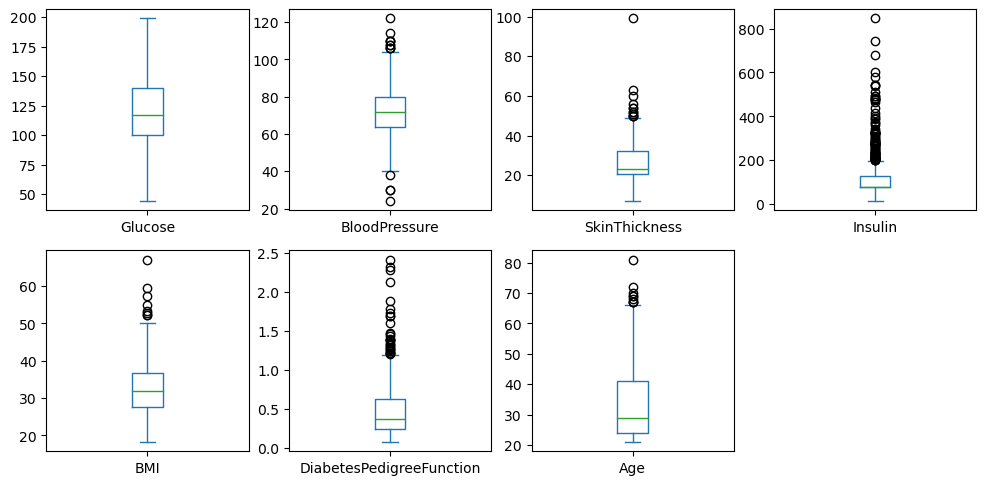

In [40]:
no_bool_data.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

A BMI superior to 40 is classified as "morbid" and thus should not be considered in this analysis.

#### a) Identifying outliers with zscore

Use z-score for each sample on the data set and specific a threshold (for example 2.5, 3, 3.5 or more standard deviations).

In [41]:
from scipy import stats
# calculate z-scores with stats
z_scores = no_bool_data.apply(stats.zscore)

# Here, we are considering 3 times the standard desviation.
# Change this evalute and evalute the results
abs_z_scores = np.abs(z_scores)
no_outliers = (abs_z_scores < 3)
new_data = no_bool_data[no_outliers]
new_data = new_data.dropna()
new_data

Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0      148.0           72.0      35.000000   79.799479  33.6   
1       85.0           66.0      29.000000   79.799479  26.6   
2      183.0           64.0      20.536458   79.799479  23.3   
3       89.0           66.0      23.000000   94.000000  28.1   
5      116.0           74.0      20.536458   79.799479  25.6   
..       ...            ...            ...         ...   ...   
763    101.0           76.0      48.000000  180.000000  32.9   
764    122.0           70.0      27.000000   79.799479  36.8   
765    121.0           72.0      23.000000  112.000000  26.2   
766    126.0           60.0      20.536458   79.799479  30.1   
767     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0  
2                       0.672  32.0  
3                       0.167  21.0  
5                       0.201  30.0  
..                        ...   ...  
763                     0.171  63.0  
764                     0.340  27.0  
765                     0.245  30.0  
766                     0.349  47.0  
767                     0.315  23.0  

[722 rows x 7 columns]

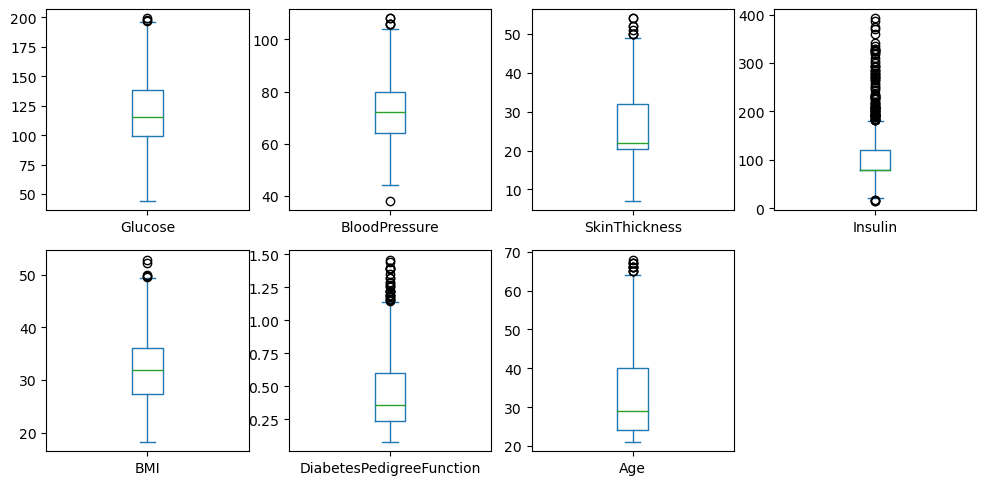

In [42]:
new_data.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

In [43]:
print("We eliminated", no_bool_data.shape[0] - new_data.shape[0], "people in the dataset. There is only", new_data.shape[0], "people left.")

We eliminated 46 people in the dataset. There is only 722 people left.


#### b) Identifying Outliers with Interquartile Range

In [44]:
Q1 = no_bool_data.quantile(0.25)
Q3 = no_bool_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [45]:
upper_outliers = no_bool_data > upper_bound
lower_outliers = no_bool_data < lower_bound

wout_outliers = no_bool_data[~(upper_outliers | lower_outliers)]
wout_outliers = wout_outliers.dropna()
wout_outliers



Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0      148.0           72.0      35.000000   79.799479  33.6   
1       85.0           66.0      29.000000   79.799479  26.6   
2      183.0           64.0      20.536458   79.799479  23.3   
3       89.0           66.0      23.000000   94.000000  28.1   
5      116.0           74.0      20.536458   79.799479  25.6   
..       ...            ...            ...         ...   ...   
763    101.0           76.0      48.000000  180.000000  32.9   
764    122.0           70.0      27.000000   79.799479  36.8   
765    121.0           72.0      23.000000  112.000000  26.2   
766    126.0           60.0      20.536458   79.799479  30.1   
767     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0  
2                       0.672  32.0  
3                       0.167  21.0  
5                       0.201  30.0  
..                        ...   ...  
763                     0.171  63.0  
764                     0.340  27.0  
765                     0.245  30.0  
766                     0.349  47.0  
767                     0.315  23.0  

[623 rows x 7 columns]

In [46]:
print("We eliminated", no_bool_data.shape[0] - wout_outliers.shape[0], "people in the dataset. There is only", wout_outliers.shape[0], "people left.")

We eliminated 145 people in the dataset. There is only 623 people left.


Glucose                        Axes(0.125,0.712609;0.168478x0.167391)
BloodPressure               Axes(0.327174,0.712609;0.168478x0.167391)
SkinThickness               Axes(0.529348,0.712609;0.168478x0.167391)
Insulin                     Axes(0.731522,0.712609;0.168478x0.167391)
BMI                            Axes(0.125,0.511739;0.168478x0.167391)
DiabetesPedigreeFunction    Axes(0.327174,0.511739;0.168478x0.167391)
Age                         Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

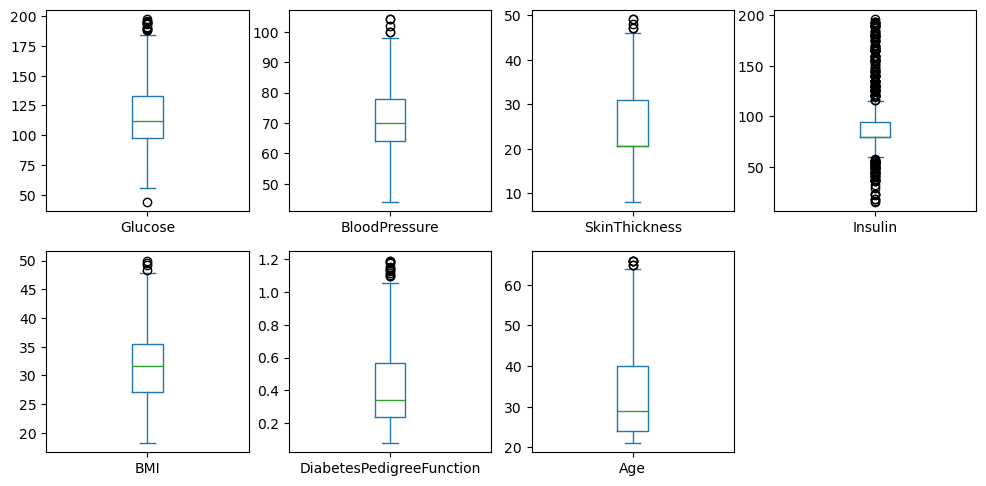

In [47]:
wout_outliers.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))


The problem with the interquartile range is that we deleted the same number of individuals with values situated over the upper bound and down the lower bound. Let's keep the z-score result.  

In [48]:
common_index = new_data.index.intersection(data.index)

# Create new DataFrames using the common index
data = data.loc[common_index]
data

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      20.536458   79.799479  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age AgeCategory  Outcome  
0                       0.627   50      Adult2        1  
1                       0.351   31      Adult1        0  
2                       0.672   32      Adult1        1  
3                       0.167   21      Adult1        0  
5                       0.201   30      Adult1        0  
..                        ...  ...         ...      ...  
763                     0.171   63      Adult2        0  
764                     0.340   27      Adult1        0  
765                     0.245   30      Adult1        0  
766                     0.349   47      Adult2        1  
767                     0.315   23      Adult1        0  

[722 rows x 10 columns]

In [49]:
data_w_cat = data
data = data.drop(columns=['AgeCategory'])
data

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      20.536458   79.799479  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[722 rows x 9 columns]

## 8.- Dealing with imbalance classes
This occurs when the number of samples in one class is much higher than the number of samples in the another class. Important to avoid bias

Text(0.5, 1.0, 'Classes distribution')

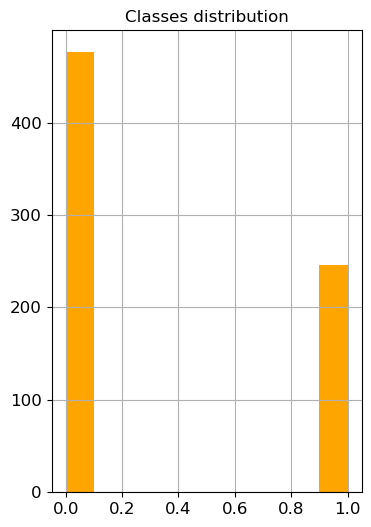

In [50]:
data['Outcome'].hist(bins=10, figsize=(4, 6), xlabelsize=12, ylabelsize=12, color='orange') # Plot a histogram for each feature. Define the size of the figure (12,18); change the number of bins as well and the xlabel and ylabel sizes
plt.title('Classes distribution')

In order to avoid to do too much oversampling, we will first perform undersampling on the major class and then oversampling on the minor class.

In [51]:
Y = data['Outcome']
X = data.drop(columns=['Outcome'])

#### a) Undersampling
Remove randomly from the majority class, with or without replacement.

In [52]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0, sampling_strategy=0.7) # 0.7 '0' class and 0.3 '1' class
X_resampled, Y_resampled = rus.fit_resample(X, Y)

Text(0.5, 1.0, 'Classes distribution')

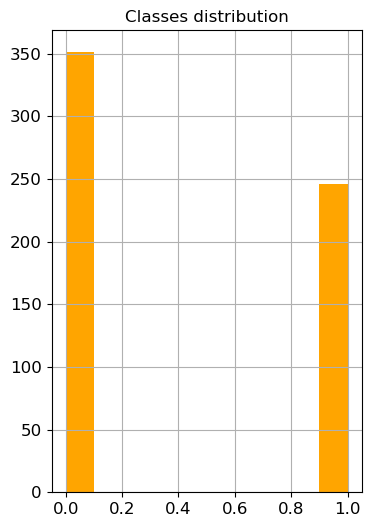

In [53]:
Y_resampled.hist(bins=10, figsize=(4, 6), xlabelsize=12, ylabelsize=12, color='orange') # Plot a histogram for each feature. Define the size of the figure (12,18); change the number of bins as well and the xlabel and ylabel sizes
plt.title('Classes distribution')

#### b) Random Oversampling
Randomly duplicate examples in the minority class.

In [54]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X_resampled, Y_resampled)

Text(0.5, 1.0, 'Classes distribution')

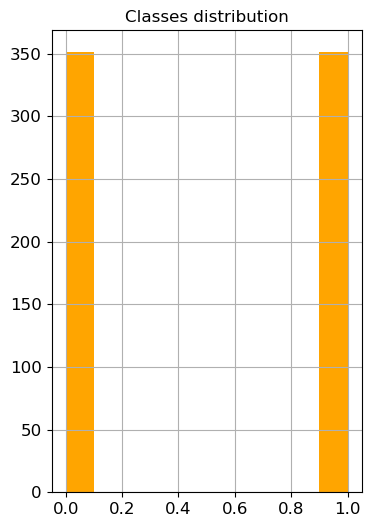

In [55]:
Y_resampled.hist(bins=10, figsize=(4, 6), xlabelsize=12, ylabelsize=12, color='orange') # Plot a histogram for each feature. Define the size of the figure (12,18); change the number of bins as well and the xlabel and ylabel sizes
plt.title('Classes distribution')

#### C) SMOTE

SMOTE is a method that over-sampling the minority ('abnormal') class
https://arxiv.org/abs/1106.1813

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, k_neighbors=5)
X_resampled, Y_resampled = sm.fit_resample(X, Y)

Text(0.5, 1.0, 'Classes distribution')

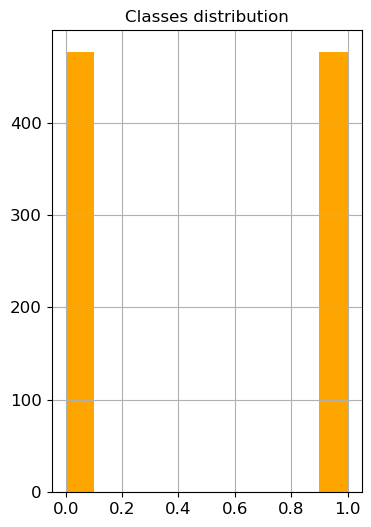

In [57]:
Y_resampled.hist(bins=10, figsize=(4, 6), xlabelsize=12, ylabelsize=12, color='orange') # Plot a histogram for each feature. Define the size of the figure (12,18); change the number of bins as well and the xlabel and ylabel sizes
plt.title('Classes distribution')

Text(0.5, 1.0, 'Features distribution after SMOTE oversampling')

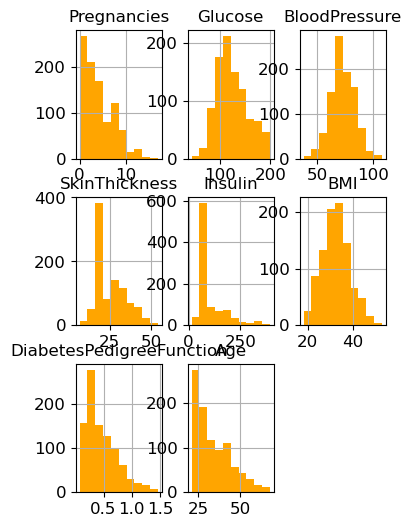

In [58]:
X_resampled.hist(bins=10, figsize=(4, 6), xlabelsize=12, ylabelsize=12, color='orange') # Plot a histogram for each feature. Define the size of the figure (12,18); change the number of bins as well and the xlabel and ylabel sizes
plt.title('Features distribution after SMOTE oversampling')

### d) ADASYN

In [59]:
from imblearn.over_sampling import ADASYN

X_resampled, Y_resampled = ADASYN().fit_resample(X, Y)

Text(0.5, 1.0, 'Classes distribution')

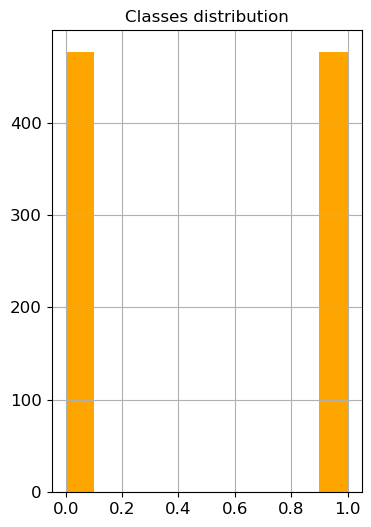

In [60]:
Y_resampled.hist(bins=10, figsize=(4, 6), xlabelsize=12, ylabelsize=12, color='orange') # Plot a histogram for each feature. Define the size of the figure (12,18); change the number of bins as well and the xlabel and ylabel sizes
plt.title('Classes distribution')

Text(0.5, 1.0, 'Features distribution after ADASYN oversampling')

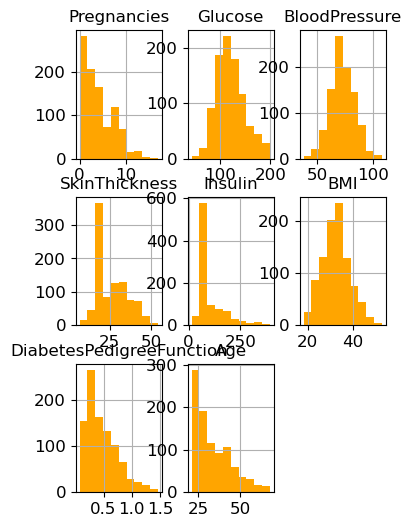

In [61]:
X_resampled.hist(bins=10, figsize=(4, 6), xlabelsize=12, ylabelsize=12, color='orange') # Plot a histogram for each feature. Define the size of the figure (12,18); change the number of bins as well and the xlabel and ylabel sizes
plt.title('Features distribution after ADASYN oversampling')

## 9.- Feature transformation.
### a) One hot encoding
Use one-hot-encoding for dealing with categorical data
Benchmark the obtained results with the one you get when using get_dummies
A one hot encoding allows the representation of categorical data to be more expressive.

In [62]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoder = OneHotEncoder()

# Fit and transform the DataFrame
encoded_data = encoder.fit_transform(data_w_cat[['AgeCategory']])

# Convert the result to a DataFrame
one_hot_data = pd.DataFrame(encoded_data.toarray(), columns=['Adult1', 'Adult2','Elderly'])

one_hot_data

Adult1  Adult2  Elderly
0       0.0     1.0      0.0
1       1.0     0.0      0.0
2       1.0     0.0      0.0
3       1.0     0.0      0.0
4       1.0     0.0      0.0
..      ...     ...      ...
717     0.0     1.0      0.0
718     1.0     0.0      0.0
719     1.0     0.0      0.0
720     0.0     1.0      0.0
721     1.0     0.0      0.0

[722 rows x 3 columns]

OneHotEncoder of scikit-learn drops columns for the categories that does not have data (Child for example)

### b) get_dummies function

In [63]:
one_hot = pd.get_dummies(data_w_cat['AgeCategory'])
one_hot

Baby  Child  Adult1  Adult2  Elderly
0       0      0       0       1        0
1       0      0       1       0        0
2       0      0       1       0        0
3       0      0       1       0        0
5       0      0       1       0        0
..    ...    ...     ...     ...      ...
763     0      0       0       1        0
764     0      0       1       0        0
765     0      0       1       0        0
766     0      0       0       1        0
767     0      0       1       0        0

[722 rows x 5 columns]

get_dummies creates one columns for each category and attribuate 1 when the individual belongs to that category, 0 for the other.

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=0)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (666, 8)
X_test shape: (286, 8)
Y_train shape: (666,)
Y_test shape: (286,)


Let's check that the classes are correctly balanced in each set.

(<Axes: title={'center': 'Outcome in testing set'}>,
 <Axes: title={'center': 'Outcome in testing set'}>,
 Text(0.5, 1.0, 'Outcome in testing set'))

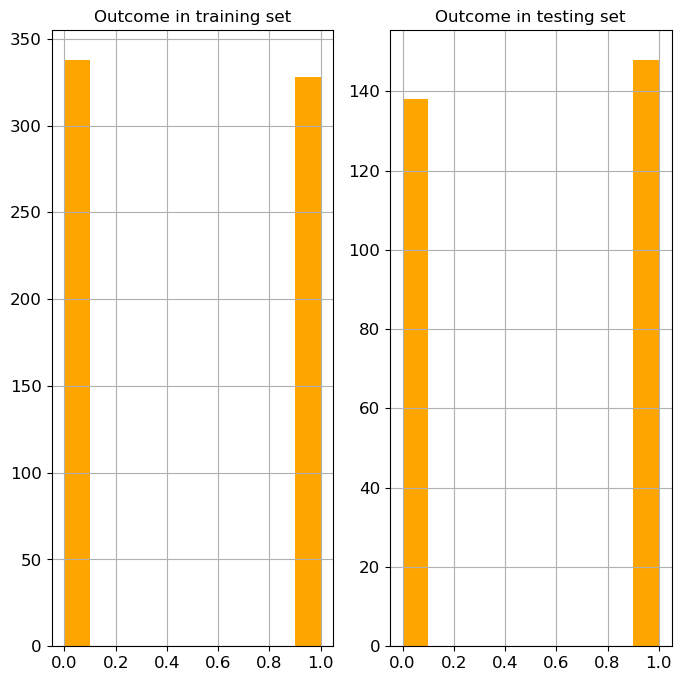

In [65]:
plt.subplot(1,2,1), Y_train.hist(figsize=(8, 8), xlabelsize=12, ylabelsize=12, color='orange'), plt.title('Outcome in training set')
plt.subplot(1,2,2), Y_test.hist(figsize=(8, 8), xlabelsize=12, ylabelsize=12, color='orange'), plt.title('Outcome in testing set')

## 10.- Normalization

Note! This is a general example. If you are dividing your data intro training and test, check carefully Section 12

#### a) Using MinMaxScaler()
IMPORTANT!! You will use the mean and the standard deviation of the training set, to normalize the test set


In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax_scaler = MinMaxScaler()
minmax_scaled_x_train = minmax_scaler.fit(X_train)
minmax_scaled_x_train = minmax_scaler.transform(X_train)
minmax_scaled_x_train = pd.DataFrame(minmax_scaled_x_train, columns=X_train.columns)
minmax_scaled_x_train.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.066667  0.370629       0.314286       0.021277  0.441489  0.207493   
1     0.133333  0.307692       0.228571       0.446809  0.236702  0.564841   
2     0.000000  0.342657       0.657143       0.288010  0.169679  0.279539   
3     0.333333  0.566434       1.000000       0.288010  0.169679  0.881844   
4     0.466667  0.657343       0.400000       0.744681  0.867021  0.475504   

   DiabetesPedigreeFunction       Age  
0                  0.628344  0.000000  
1                  0.303688  0.063830  
2                  0.479393  0.872340  
3                  0.107737  0.340426  
4                  0.462762  0.446809

As the MinMax scaler depends on standard deviation of the data, it is important to normalize each set separately.

In [67]:
minmax_scaled_x_test = minmax_scaler.transform(X_test)
minmax_scaled_x_test = pd.DataFrame(minmax_scaled_x_test, columns=X_test.columns)

As the output data has values of 0 and 1, it does not need to be normalized.

In [68]:
# Using minmax scaler, but now the range is [0,2]. Can you write the equation to do it?
minmax_scaler = MinMaxScaler(feature_range=(0, 2))
minmax_scaled_x_train2 = minmax_scaler.fit(X_train)
minmax_scaled_x_train2 = minmax_scaler.transform(X_train)
minmax_scaled_x_train2 = pd.DataFrame(minmax_scaled_x_train2, columns=X_train.columns)
minmax_scaled_x_train2.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.133333  0.741259       0.628571       0.042553  0.882979  0.414986   
1     0.266667  0.615385       0.457143       0.893617  0.473404  1.129683   
2     0.000000  0.685315       1.314286       0.576020  0.339359  0.559078   
3     0.666667  1.132867       2.000000       0.576020  0.339359  1.763689   
4     0.933333  1.314685       0.800000       1.489362  1.734043  0.951009   

   DiabetesPedigreeFunction       Age  
0                  1.256688  0.000000  
1                  0.607375  0.127660  
2                  0.958785  1.744681  
3                  0.215474  0.680851  
4                  0.925524  0.893617

#### b) Standardization
By applying standardization, each column will have mean  0 and the standard deviation 1

In [69]:
znorm_scaler = StandardScaler()
znorm_scaled_x_train = znorm_scaler.fit(X_train)
znorm_scaled_x_train = znorm_scaler.transform(X_train)
znorm_scaled_x_train = pd.DataFrame(znorm_scaled_x_train, columns=X_train.columns)
znorm_scaled_x_train.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.910439 -0.423027      -1.131380      -2.149820  1.096252 -1.233292   
1    -0.608470 -0.761132      -1.668600       0.107204 -0.111072  0.815850   
2    -1.212407 -0.573296       1.017500      -0.735066 -0.506205 -0.820158   
3     0.297434  0.628857       3.166381      -0.735066 -0.506205  2.633637   
4     0.901371  1.117232      -0.594160       1.687120  3.604977  0.303565   

   DiabetesPedigreeFunction       Age  
0                  1.707271 -1.149911  
1                  0.101323 -0.875416  
2                  0.970466  2.601519  
3                 -0.867968  0.314062  
4                  0.888202  0.771553

As we did above, We also perform the normalization on the test dataset.

In [70]:
znorm_scaled_x_test = znorm_scaler.transform(X_test)
znorm_scaled_x_test = pd.DataFrame(znorm_scaled_x_test, columns=X_test.columns)

## 11.- Correlation

#### Plot the dispersion matrix

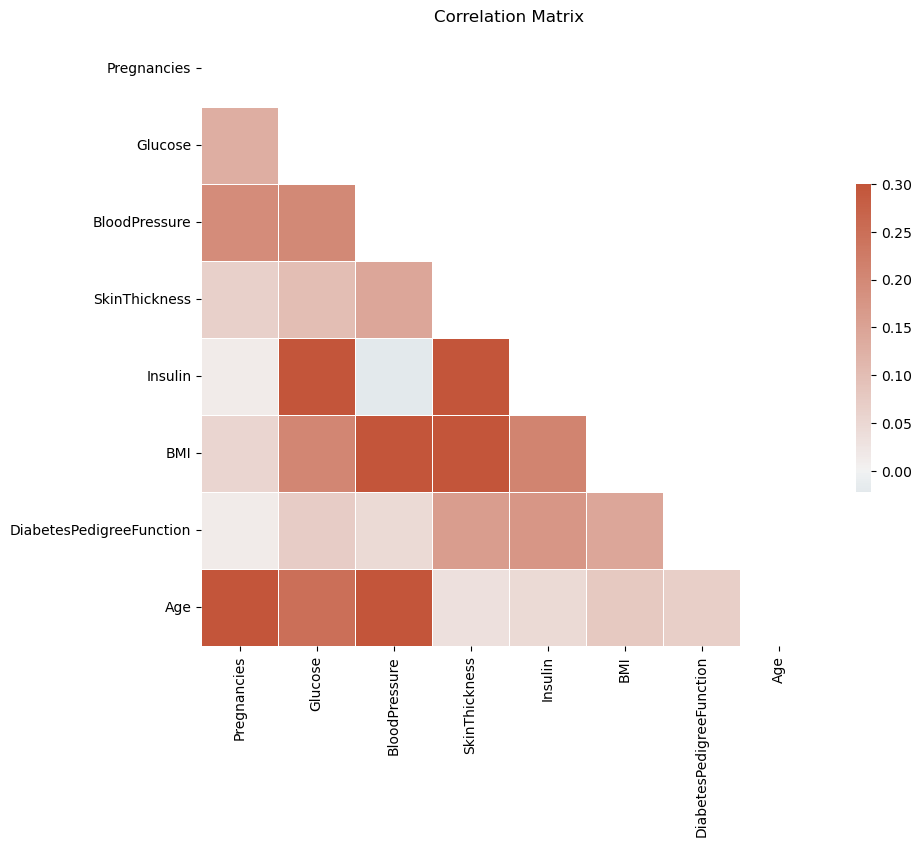

In [71]:
# Plot the correlation matrix. Please comment the results. Which feature are more correlated?
# Calculate the correlation matrix
corr_matrix = X_resampled.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix")
plt.show()

Insulin corr with glucose and skin thickness
BMI with blood pressure and skin thickness
Age with pregnancies and blood pressure
But not enough (max is 0.3, it is not so close to 1)

##  12.-  Training, validation and test sets

In this section, the available cases will be separated into two subsets: a training subset and a test subset. The subsets will not share any case in common. The training subset will be used in the next modules to perform the learning of some models, and the test subset to evaluate their performance.

Before perform the separation into subsets, respond in a reasoned manner (justifying your response) to
the following issues:


a) What percentage of available cases will you consider in the training subset? And in the test subset?

30% for testing and 70% for training.

b) Consider that you build a binary classifier (two classes, C1 and C2). Discuss what would happen when evaluating the classifier's performance if the training subset with which the classifier is designed had almost all the cases of class C1 and the test subset had almost all the cases of class C2.

Training subset has to have balanced classes.

c) How could you avoid overtraining in the design of the classifier? What would be the
process to be followed to find the best parameters of that model?

We would have to tune the parameters according to the results that we get in the testing set, not in the training set

d) Explain which tools, from those presented in the course, you would use to roughly check whether each variable in the test subset follows the same distribution as the corresponding variable in the training subset.

Histogram

e) Discuss what you should do with the original data set if you find that the distribution
of the test subset cases is different from the distribution of the
training subset.

Not to use the accuracy as metric to evaluate the model because it will be biased.

# Save the dataset

In [72]:
X_resampled.to_csv("X_resampled.csv", index=False)
Y_resampled.to_csv("Y_resampled.csv", index=False)

# The different train and test input sets with ADASYN oversampling
minmax_scaled_x_train.to_csv("minmax_scaled_x_train.csv", index=False)
minmax_scaled_x_test.to_csv("minmax_scaled_x_test.csv", index=False)
znorm_scaled_x_train.to_csv("znorm_scaled_x_train.csv", index=False)
znorm_scaled_x_test.to_csv("znorm_scaled_x_test.csv", index=False)

# The training and testing output sets with ADASYN oversampling
Y_train.to_csv("Y_train.csv", index=False)
Y_test.to_csv("Y_test.csv", index=False)